In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit

In [14]:
# Define functions for optimization
def scale_function(x, alpha, beta):
    """Scaling function
    """
    return x / np.power(1 + np.power(abs(x), alpha), beta/alpha)

def func(qT, chi, kappa, alpha, beta):
    """Function used for optimization
    """
    q = qT[0]
    T = qT[1]
    x = q / np.power(T, kappa)
    return np.power(T, chi) * scale_function( x, alpha, beta )    

In [252]:
# Test data
# x-axis number of sample
n = 10001

# T matrix matching with x-axis
T = np.array([5, 10, 20, 50, 100])
T_mat = np.transpose(np.tile(T, (n, 1)))

# repeat x-axis sample for 
q_min, q_max = -5, 5
q = np.linspace(q_min, q_max, n)
q_mat = np.tile(q, (len(T), 1))

# check dimensions
print(T_mat.shape)
print(q_mat.shape)

(5, 10001)
(5, 10001)


In [253]:
# function to feed in func need to be flatten
q_data = q_mat.flatten()
T_data = T_mat.flatten()
qT_data = np.array( [q_data, T_data] )
qT_data.shape

(2, 50005)

In [254]:
# simulate prediction
y = func(qT_data, 0.51, 0.75, 0.5, 1)
np.random.seed(20541)
y_noise = 0.01 * np.random.normal(size=q_data.size)
y_data = y + y_noise
y_mat = np.reshape(y_data, (len(T), n))
print(y_data.shape)
print(y_mat.shape)

(50005,)
(5, 10001)


In [255]:
popt, pcov = curve_fit(func, qT_data, y_data, bounds=(0, np.inf))
popt

array([0.51059449, 0.75059685, 0.49963653, 0.99966549])

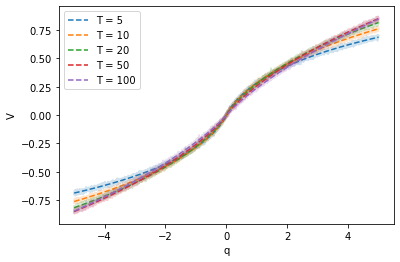

In [258]:
for idx, t in np.ndenumerate(T):
    plt.plot(q, y_mat[idx[0]], color='C'+str(idx[0]), alpha=0.2)
    plt.plot(q, func(np.array( [q, T_mat[idx[0]]] ), *popt), '--', color='C'+str(idx[0]), label='T = '+str(T_mat[idx[0], 1]))
#'fit: chi=%5.3f, kappa=%5.3f, alpha=%5.3f, beta=%5.3f' % tuple(popt)

plt.xlabel('q')
plt.ylabel('V')
plt.legend()
plt.show()